# Netflix top 10 most watched in each category

Loading packages and data frame

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Data Sets/Netflix-most-popular.csv')
df.head()

,category,rank,show_title,season_title,hours_viewed_first_91_days,runtime,views_first_91_days
0,Films (English),1,Red Notice,NaN,454200000,1.9667,230900000
1,Films (English),2,Don't Look Up,NaN,408600000,2.3833,171400000
2,Films (English),3,The Adam Project,NaN,281000000,1.7833,157600000
3,Films (English),4,Bird Box,NaN,325300000,2.0667,157400000
4,Films (English),5,The Gray Man,NaN,299500000,2.1500,139300000


## Computing total views by category

In [3]:
total_views_by_category = df.groupby('category')['views_first_91_days'].sum().reset_index()
print(total_views_by_category)

              category  views_first_91_days
0      Films (English)           1537200000
1  Films (Non-English)            663400000
2         TV (English)           1185600000
3     TV (Non-English)            933100000


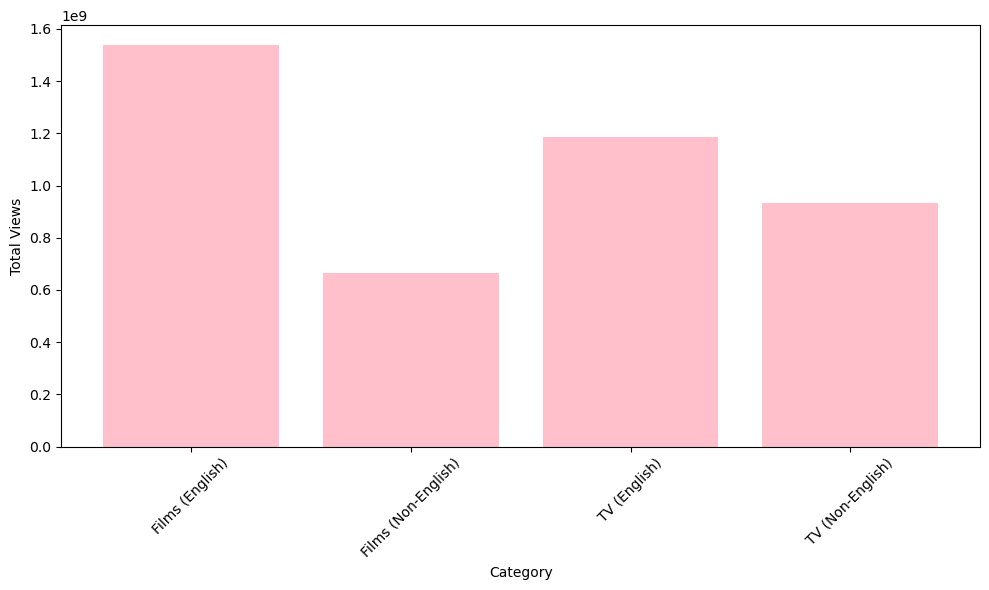

In [4]:
plt.figure(figsize=(10,6))
plt.bar(total_views_by_category['category'], total_views_by_category['views_first_91_days'], color = 'pink')
plt.xlabel('Category')
plt.ylabel('Total Views')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

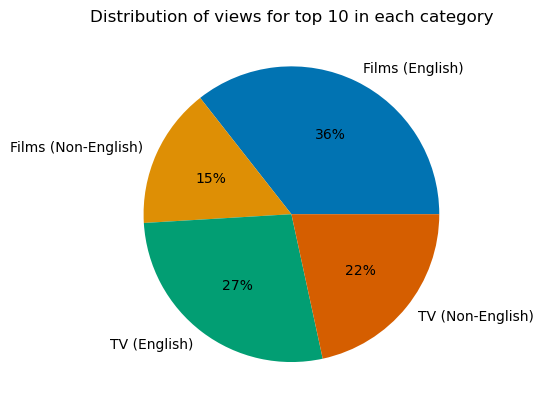

In [5]:
plt.pie(total_views_by_category['views_first_91_days'], labels = total_views_by_category['category'], colors = sns.color_palette('colorblind'), autopct='%.0f%%')
plt.title('Distribution of views for top 10 in each category')
plt.show()

## Plotting most viewed media, bar color coordinating to type of media

In [6]:
df.sort_values('views_first_91_days', ascending=False, inplace=True)

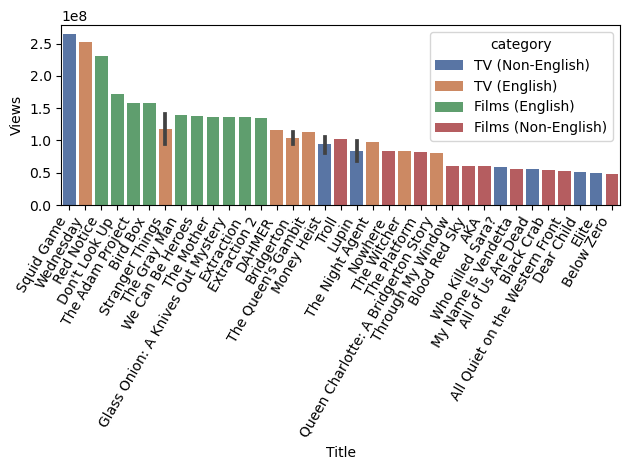

In [7]:
sns.barplot(x=df['show_title'], y=df['views_first_91_days'], hue=df['category'], palette='deep', dodge=False)
#hue adds color as a variable based on category
#when using hue, if you want bars to be spaced evenly, set dodge = False
plt.xlabel('Title')
plt.ylabel('Views')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

There is a problem above, what do you think the black bars are representing? Can you dig through the data to see why this is happening? How could we fix this?

# Employee Retention/Attrition data

## Exploring Data Set

In [8]:
df2 = pd.read_csv('Data Sets/HR_Analytics.csv')
df2.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [9]:
df2.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [10]:
df2.shape

(1470, 35)

Find any missing values

In [11]:
df2.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Data looks clean, let's see a summary

In [12]:
df2.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Columns with standard deviation 0 are likely all the same value. Let's split columns up by data type, categorical or numerical

In [13]:
df2.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [14]:
cat_columns = df2.select_dtypes(['object']).columns
num_columns = df2.select_dtypes(['int64']).columns

print(cat_columns)
print(num_columns)

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')
Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [15]:
for col in cat_columns:
    print(df2[col].value_counts())
    print('==========================')

No     1233
Yes     237
Name: Attrition, dtype: int64
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
Male      882
Female    588
Name: Gender, dtype: int64
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64
Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64
Y    1470
Name: Over18, dtype: int64
No     1054
Yes     416
Name: Over

A quick overview of the data set:

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'EmployeeCount'}>],
       [<Axes: title={'center': 'EmployeeNumber'}>,
        <Axes: title={'center': 'EnvironmentSatisfaction'}>,
        <Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'JobInvolvement'}>,
        <Axes: title={'center': 'JobLevel'}>],
       [<Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'MonthlyRate'}>,
        <Axes: title={'center': 'NumCompaniesWorked'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>],
       [<Axes: title={'center': 'PerformanceRating'}>,
        <Axes: title={'center': 'RelationshipSatisfaction'}>,
        <Axes: title={'center': 'StandardHours'}>,
        <Axes: title={'center': 'StockOptionLevel'}>,
        <Axe

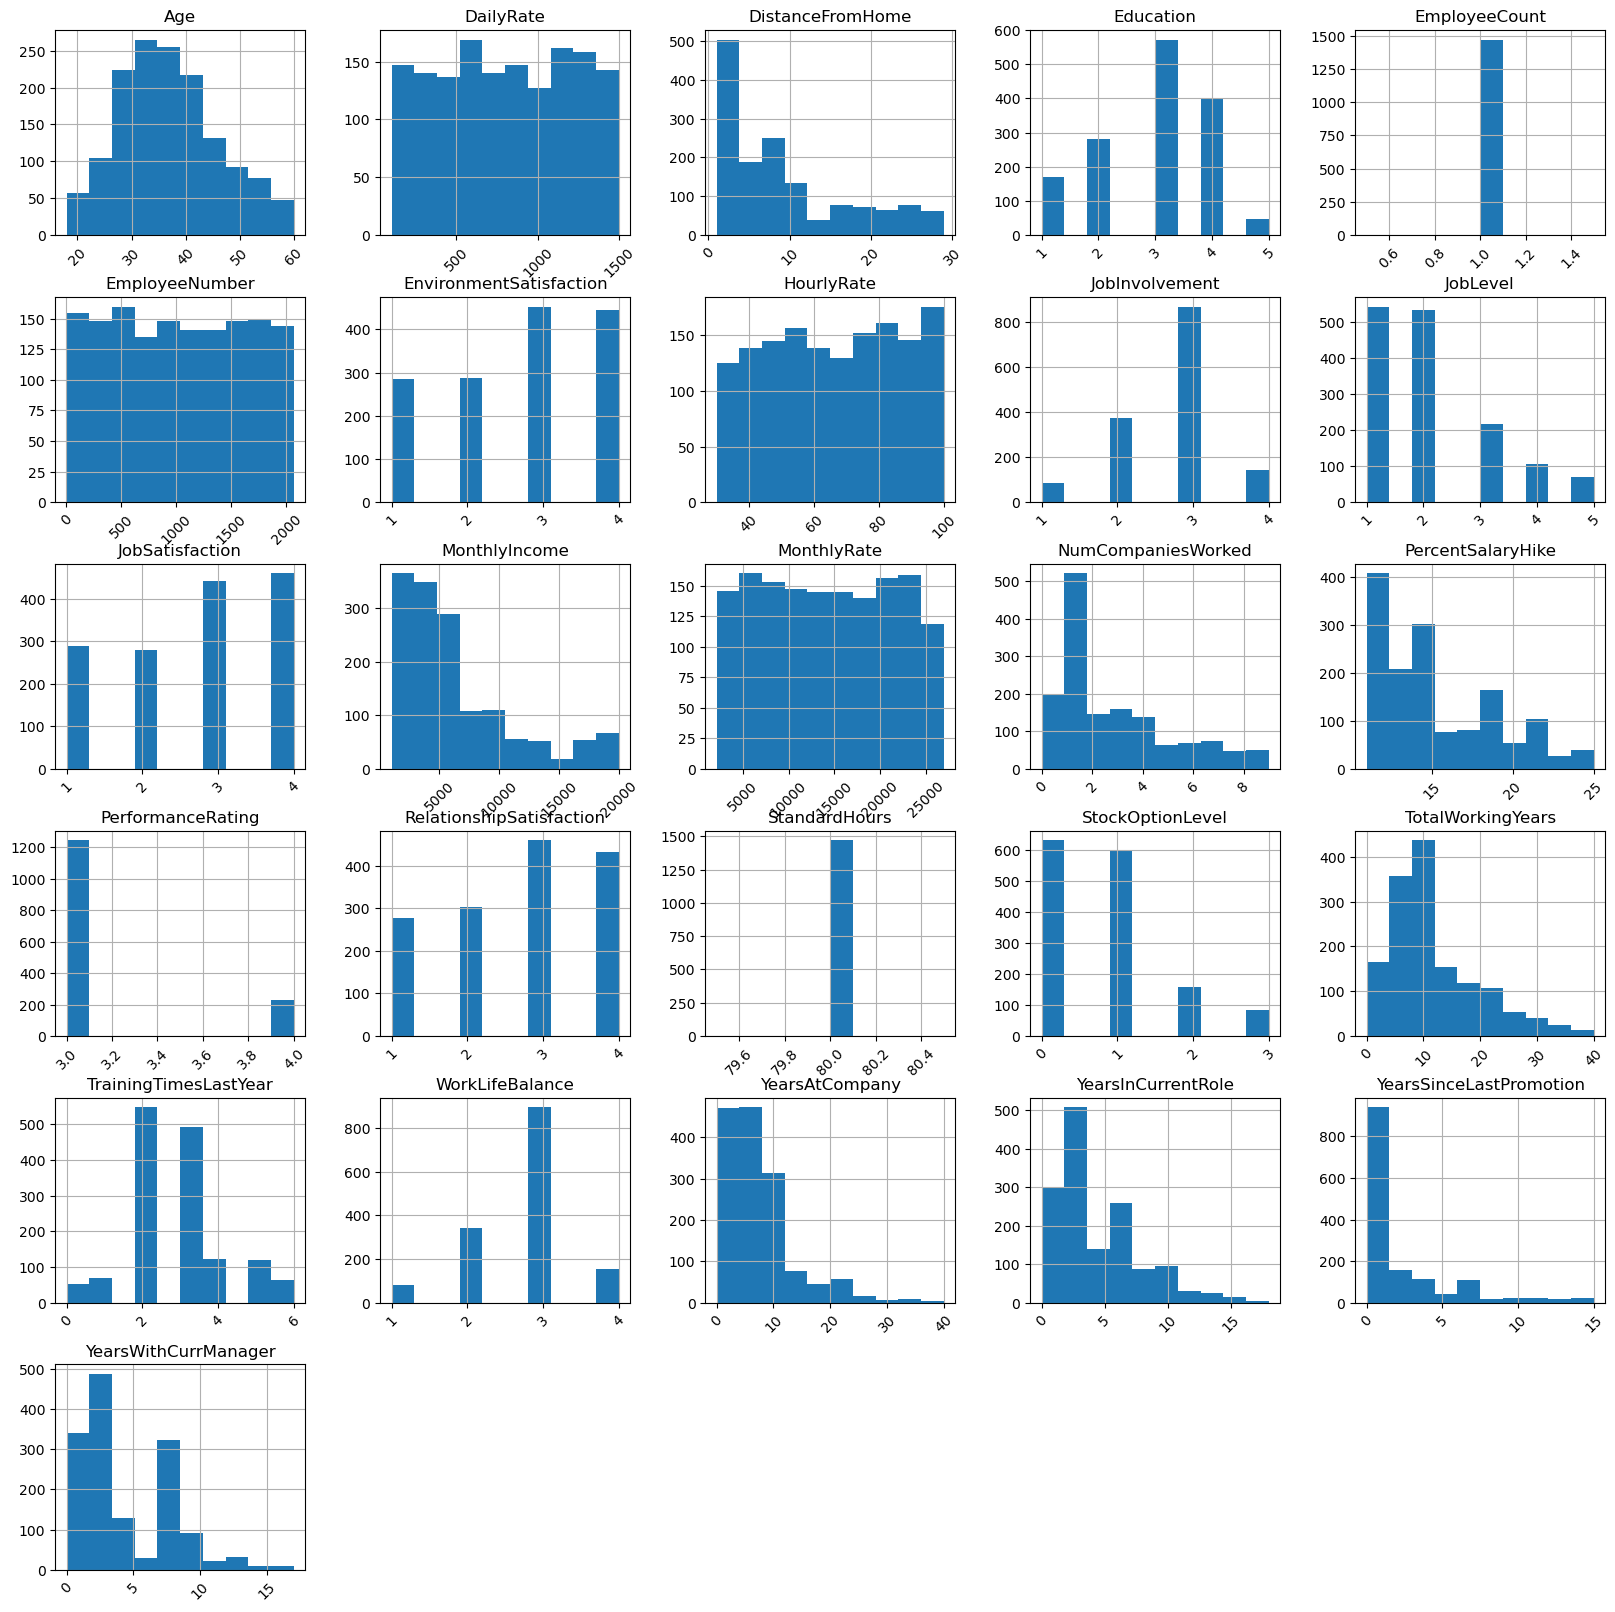

In [16]:
df2.hist(figsize=(20,20), xrot=45)

### Plotting attrition rates in some basic categories

<Axes: xlabel='count', ylabel='BusinessTravel'>

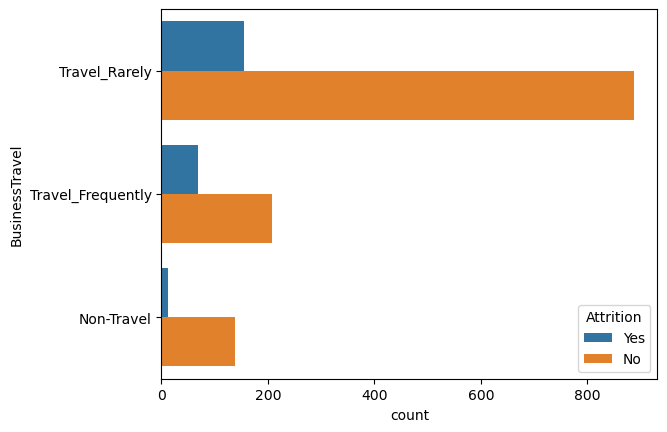

In [17]:
sns.countplot(y = 'BusinessTravel', hue = 'Attrition', data = df2)

What might be a better chart to show?

In [18]:
Travel_Attrition = df2.groupby('BusinessTravel')['Attrition'].sum()
print(Travel_Attrition)

BusinessTravel
Non-Travel           NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...
Travel_Frequently    NoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesN...
Travel_Rarely        YesYesNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoYesNoN...
Name: Attrition, dtype: object


Oops! Need to convert Yes/No to 1/0

In [19]:
df2['Attrition']=df2['Attrition'].replace(['Yes', 'No'], [1, 0])

In [20]:
Travel_Totals = df2.groupby('BusinessTravel')['Attrition'].count()
print(Travel_Totals)
Travel_Attrition = df2.groupby('BusinessTravel')['Attrition'].sum()
print(Travel_Attrition)

BusinessTravel
Non-Travel            150
Travel_Frequently     277
Travel_Rarely        1043
Name: Attrition, dtype: int64
BusinessTravel
Non-Travel            12
Travel_Frequently     69
Travel_Rarely        156
Name: Attrition, dtype: int64


In [21]:
Travel_Attrition_Percents = (Travel_Attrition/Travel_Totals).reset_index()
print(Travel_Attrition_Percents)

      BusinessTravel  Attrition
0         Non-Travel   0.080000
1  Travel_Frequently   0.249097
2      Travel_Rarely   0.149569


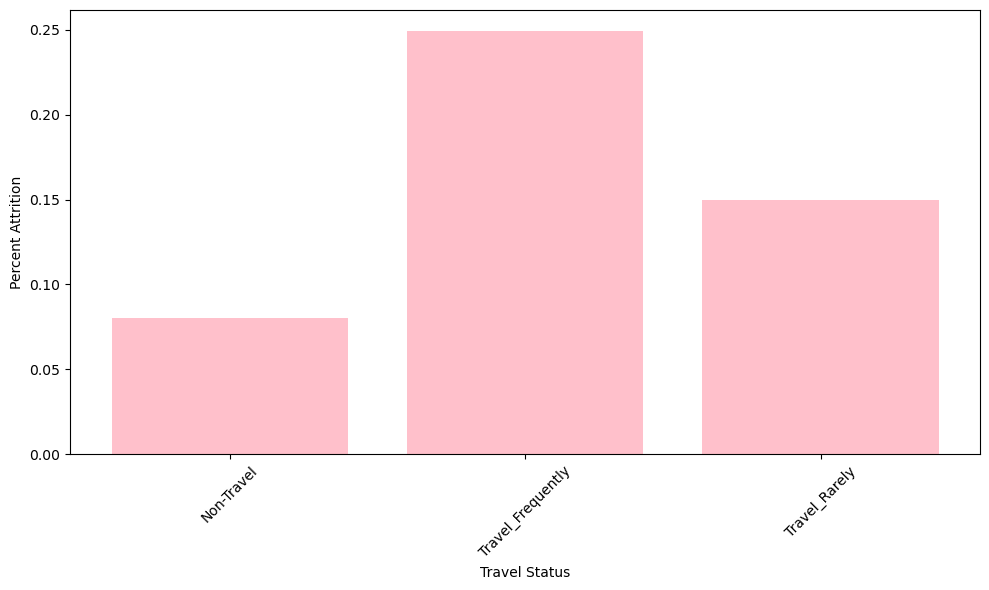

In [22]:
plt.figure(figsize=(10,6))
plt.bar(Travel_Attrition_Percents['BusinessTravel'], Travel_Attrition_Percents['Attrition'], color = 'pink')
plt.xlabel('Travel Status')
plt.ylabel('Percent Attrition')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Can you think of more in depth ways to split this data up? Does marital status play a part in the desire to not want to travel?

## Examining correlation

Convert categorical values to numerical values

In [23]:
from sklearn.preprocessing import LabelEncoder


def convertToNumericalCol(df, col_name):
    print("Starting to convert: " , col_name)
    le = LabelEncoder()
    label = le.fit_transform(df[col_name])
    df.drop(col_name,axis=1, inplace=True)
    df[col_name]= label

In [24]:
for col in cat_columns:
    convertToNumericalCol(df2, col)

Starting to convert:  Attrition
Starting to convert:  BusinessTravel
Starting to convert:  Department
Starting to convert:  EducationField
Starting to convert:  Gender
Starting to convert:  JobRole
Starting to convert:  MaritalStatus
Starting to convert:  Over18
Starting to convert:  OverTime


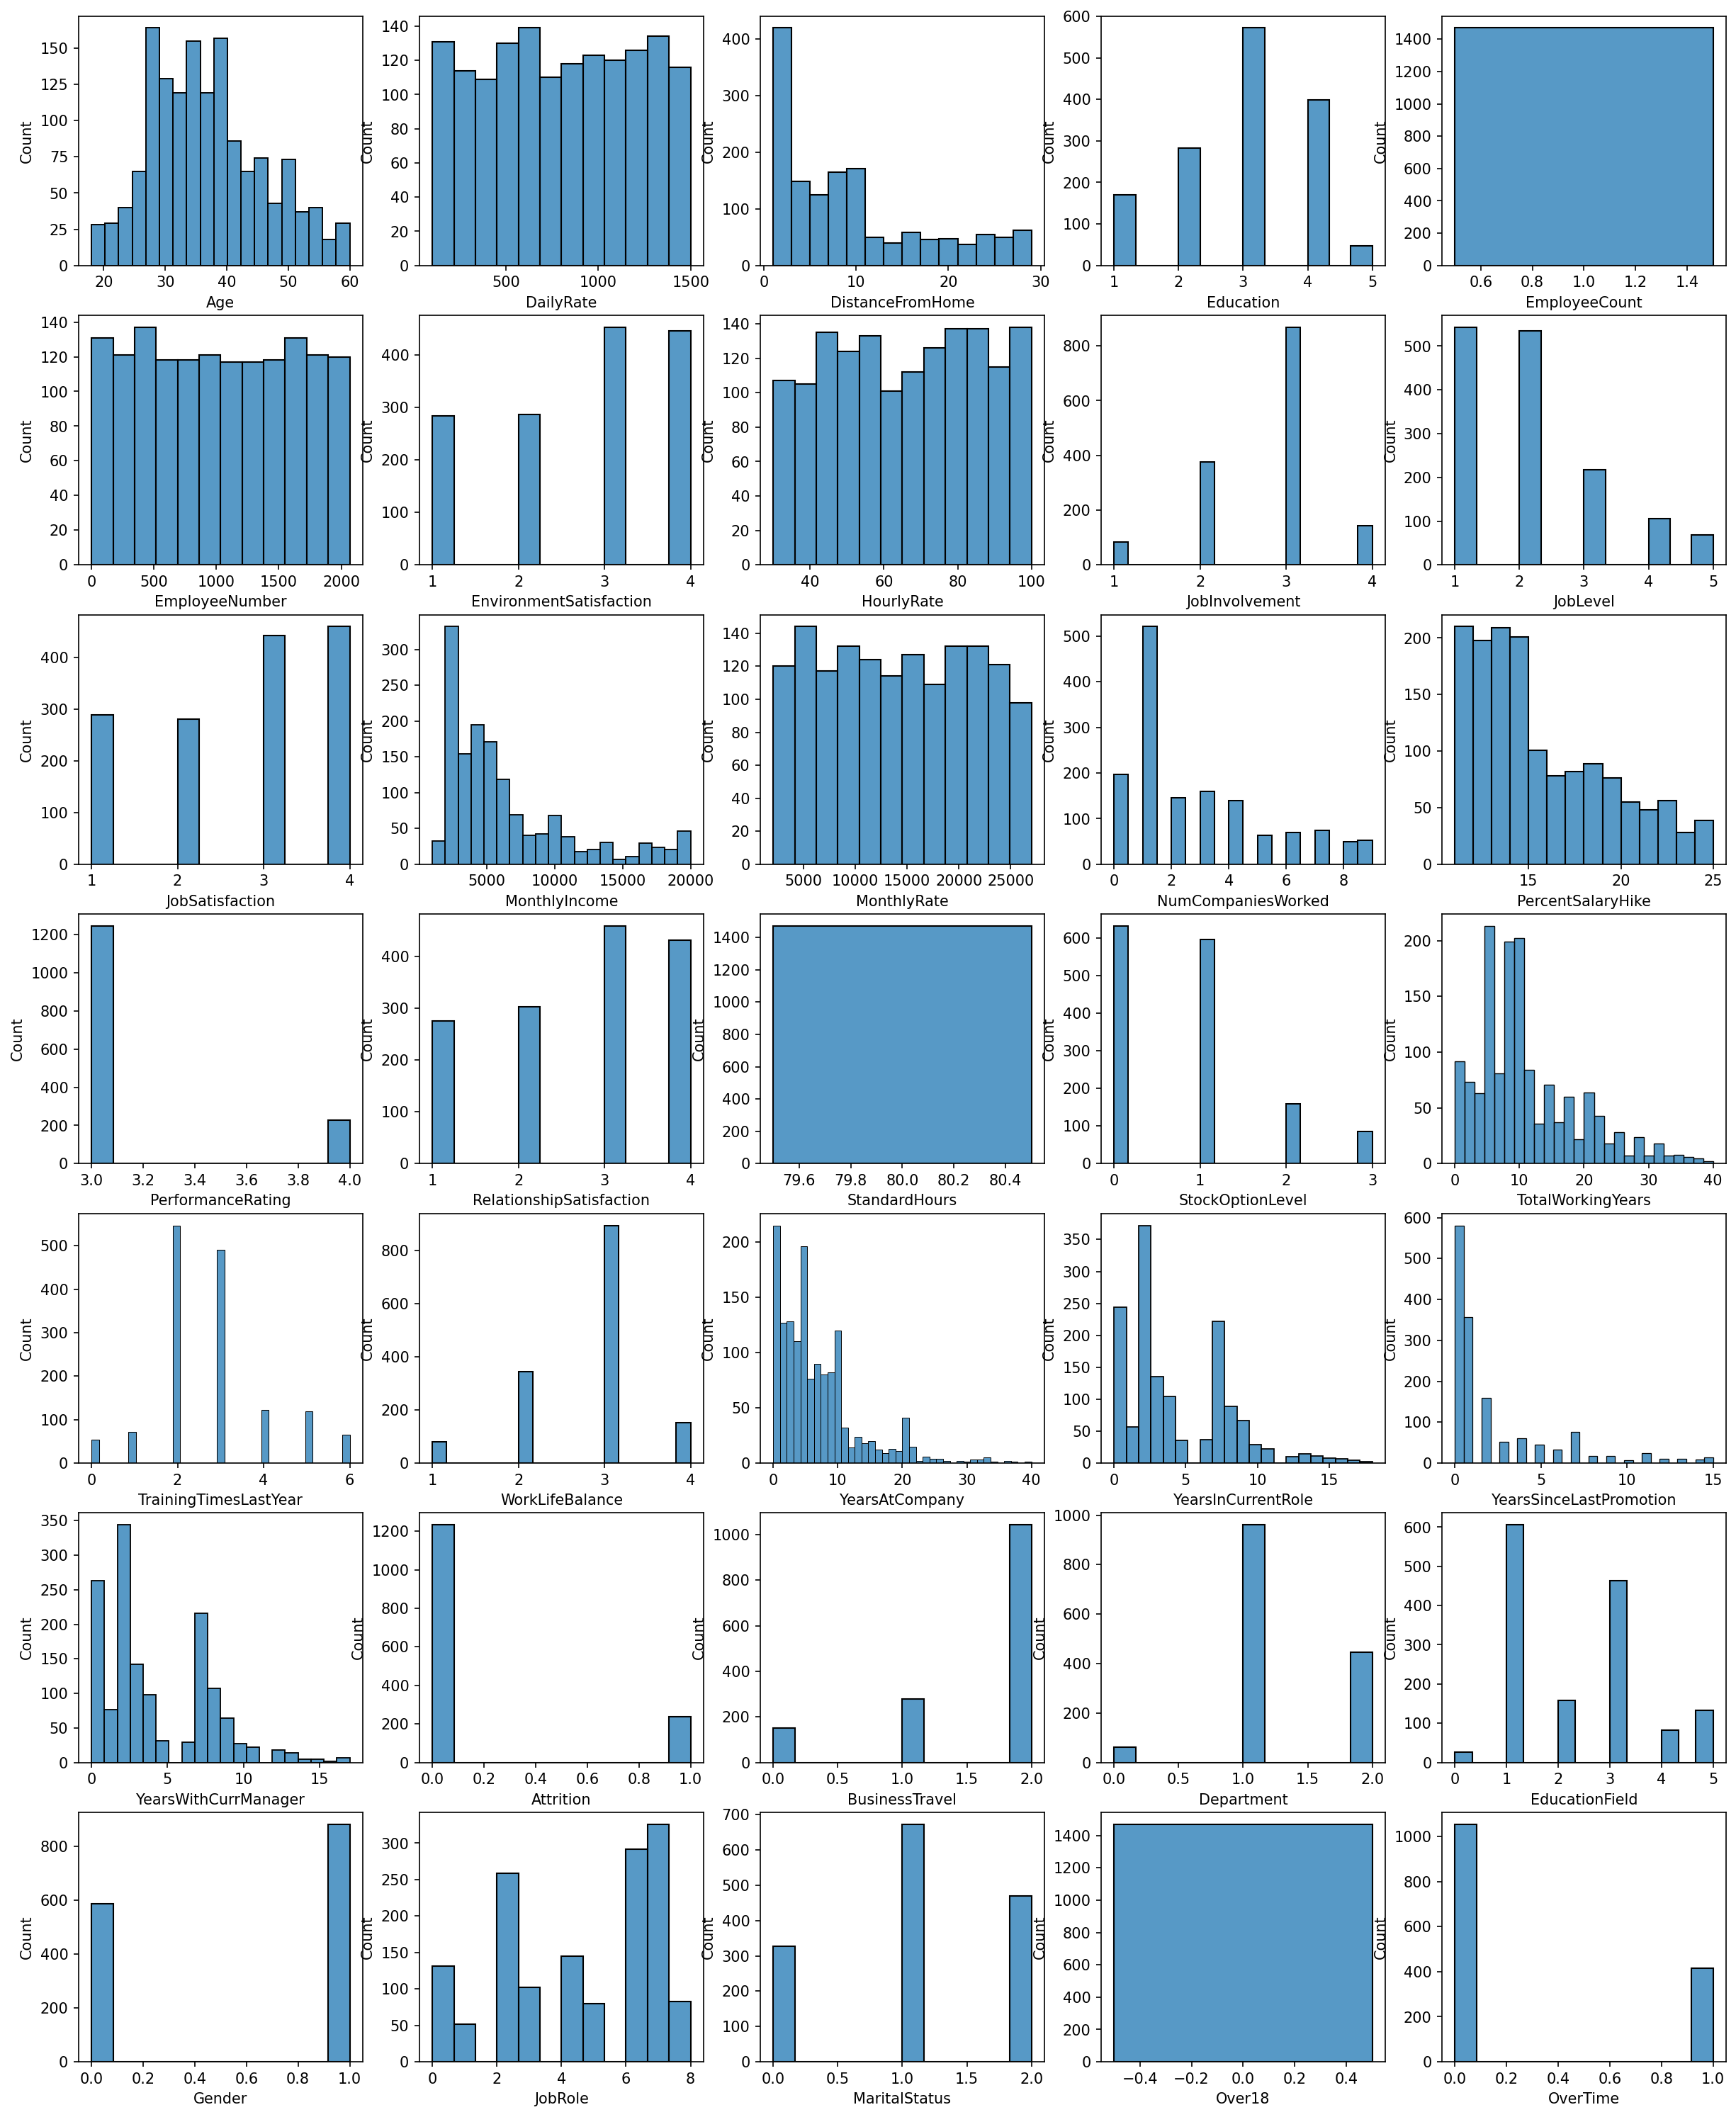

In [25]:
# Create histogram for features using subplot.
fig, axis = plt.subplots(nrows = 7, ncols = 5, figsize = (20, 25), dpi = 150) 

# For 35 features, create subplot having 7 rows and 5 columns.
count = 0

for i in range(0, 7):
  for j in range(0, 5):
    column = df2.iloc[:, count]      # Fetching the current column and all rows of that column.
 
    sns.histplot(column, ax = axis[i, j])
    count = count + 1

plt.show()

based on the above graph, following columns are removed,

    Over 18 - All values are at 1.
    Employee Count - All values are at 1.
    Standard Hours - All values are at 80.
    Employee Number



In [26]:
df2.drop('Over18', axis=1, inplace=True)
df2.drop('EmployeeCount', axis=1, inplace=True)
df2.drop('StandardHours', axis=1, inplace=True)
df2.drop('EmployeeNumber', axis=1, inplace=True)

In [27]:
corr = df2.corr()
corr.sort_values(['Attrition'], axis=0, ascending=False, inplace=True)
corr.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
Attrition,-0.159205,-0.056652,0.077924,-0.031373,-0.103369,-0.006846,-0.130016,-0.169105,-0.103481,-0.159840,...,-0.033019,-0.156199,1.000000,0.000074,0.063991,0.026846,0.029453,0.067151,0.162070,0.246118
OverTime,0.028062,0.009135,0.025514,-0.020322,0.070132,-0.007782,-0.003507,0.000544,0.024539,0.006089,...,-0.012239,-0.041586,0.246118,0.016543,0.007481,0.002259,-0.041924,0.040662,-0.017521,1.000000
MaritalStatus,-0.095029,-0.069586,-0.014437,0.004053,-0.003593,-0.017861,-0.038497,-0.076769,0.024360,-0.075450,...,-0.030915,-0.038570,0.162070,0.024001,0.056073,0.014420,-0.047183,0.067957,1.000000,-0.017521
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.010029,0.014406,0.077924,-0.024469,0.017225,0.002013,-0.001851,-0.001015,-0.014437,0.025514
JobRole,-0.122427,-0.009472,-0.001015,0.004236,-0.017321,-0.018861,0.006616,-0.085457,0.017537,-0.093951,...,-0.046384,-0.041150,0.067151,0.002724,0.662431,0.015599,-0.039723,1.000000,0.067957,0.040662


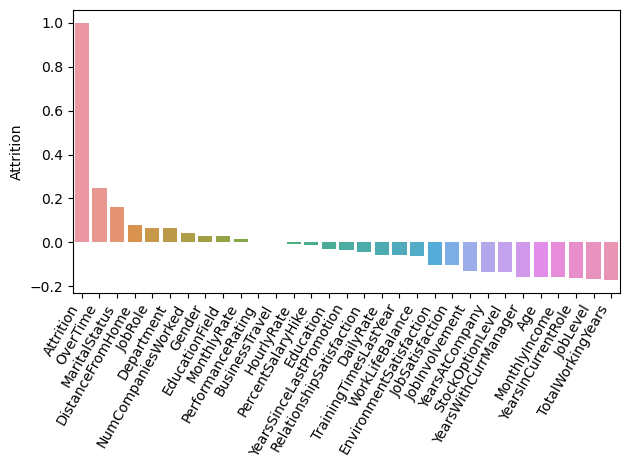

In [28]:
sns.barplot(x=corr.index, y=corr['Attrition'])
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

What else could you think of doing? From the data set publishers:

1. Identifying performance profiles of employees at risk for attrition through predictive analytics and using this insight to create personalized development plans or retention strategies.
2. Using the data to assess the impact of different financial incentives or variations in job role/structure on employee attitudes, satisfaction and ultimately attrition rates.
3. Analyzing different age groups' responses to various perks or turnover patterns in order to understand how organizations can better engage different demographic segments

